In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-23 17:53:28.045296: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 17:53:28.057550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771865608.071079 2433146 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771865608.075193 2433146 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771865608.085915 2433146 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [8]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [9]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [10]:
from ase.build import bulk

In [4]:
from pyace.asecalc import PyGRACEFSCalculator

/fscratch/conda/tp2/lib/python3.10/site-packages/pyace/multispecies_basisextension.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [6]:
calc=TPCalculator("seed/1/final_model/")

In [11]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [12]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [13]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.010481,0.010481
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.032078,0.032078
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",NaN,0.000000,0.000000
3,Li__mp-567337,"(Atom('Li', [-0.9218888897176146, 2.8025429460...",NaN,0.008819,0.008819
4,Li__mp-10173,"(Atom('Li', [-1.1807313597921131e-06, 1.740594...",NaN,0.005988,0.005988
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",NaN,0.001672,0.001672
6,Li__mp-976411,"(Atom('Li', [0.0, 0.0, 1.0216207669999998e-05]...",NaN,0.005889,0.005889
7,Li__mp-1103107,"(Atom('Li', [1.379696372079909, 3.982485883382...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",NaN,0.015671,0.015671
9,Li__mp-1018134,"(Atom('Li', [4.618009551014942, 2.666207852974...",NaN,0.000000,0.000000


In [14]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [15]:
pipeline_dict={}

In [16]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-23 17:54:47,919 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:54:47,922 - root - INFO - =======================
2026-02-23 17:54:47,924 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)):   0%|                                                                              | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1771865688.248564 2433146 service.cc:152] XLA service 0x55f42d792cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771865688.248586 2433146 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-23 17:54:48.533242: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1771865688.988621 2433146 cuda_dnn.cc:529] Loaded cuDNN version 9

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [18]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-14.970661,-3.742665,66.907576,56.978397,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.009268,9.268307e-03
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-7.156477,-3.578239,28.272979,379.303311,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.173695,1.736948e-01
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",-3.751933,-3.751933,16.381795,65.794329,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000e+00
3,Li__mp-567337,"(Atom('Li', [-0.9886157450383428, 2.8096347967...",-15.306378,-1.913297,162.984573,18.980124,{'Li': 8},8,"((Li, 1.0),)",0,0.000000,8,1.000000,0.003791,3.790900e-03
4,Li__mp-10173,"(Atom('Li', [-1.2537505615058892e-06, 1.741406...",-3.820261,-1.910130,39.361414,25.652845,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.006958,6.957823e-03
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",-1.917088,-1.917088,21.835625,42.382956,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,0.000000e+00
6,Li__mp-976411,"(Atom('Li', [-8.346113946427003e-22, 8.5370837...",-7.659240,-1.914810,78.503773,20.523081,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.002278,2.277986e-03
7,Li__mp-1103107,"(Atom('Li', [0.7579039342747378, 4.21507781279...",-22.756119,-1.896343,244.037306,56.714655,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.020745,2.074484e-02
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",-5.730169,-1.910056,59.586879,42.102526,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.007032,7.031837e-03
9,Li__mp-1018134,"(Atom('Li', [4.531940176384602, 2.616518327887...",-5.738734,-1.912911,58.985844,22.605722,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.004177,4.176838e-03


In [20]:
calc_ft=TPCalculator("../3a-finetuning/seed/1/final_model/")

In [21]:
pipeline_dict_ft = {}

In [22]:
df_ft, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_ft, pipeline_dict=pipeline_dict_ft)

2026-02-23 17:56:22,968 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:56:22,969 - root - INFO - =======================
2026-02-23 17:56:22,970 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.13s/it]
2026-02-23 17:56:29,109 - root - INFO - Step status: finished
2026-02-23 17:56:29,110 - root - INFO - =======================
2026-02-23 17:56:29,111 - root - INFO - =======================
2026-02-23 17:56:29,112 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 82.94it/s]
2026-02-23 17:56:29,251 - root - INFO - Job is done
2026-02-23 17:56:29,252 - root - INFO - Step status: finished
2026-02-23 17:56:29,253 - root - INFO - =======================
2026-02-23 17:56:29,253 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

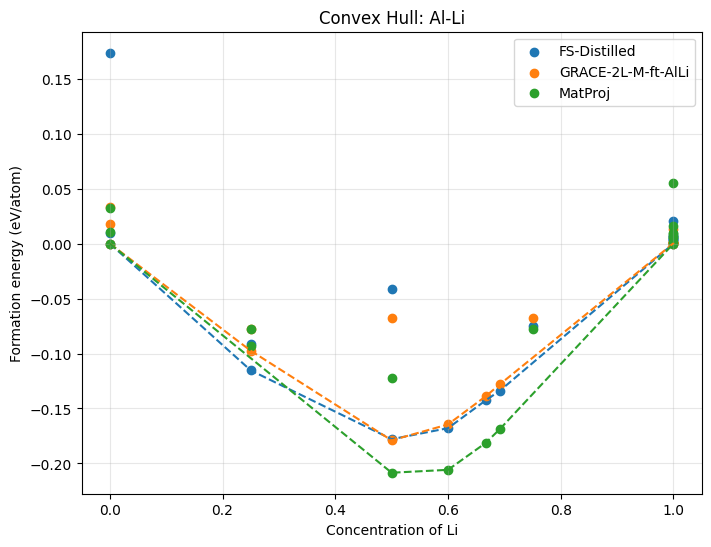

In [23]:
plot_convex_hull({
    "FS-Distilled":df,
    "GRACE-2L-M-ft-AlLi":df_ft, 
      "MatProj":ref_df
})